In [116]:
!ls *.ipynb

Charecter_Movie_4035_Data_주연_조연_Processing.ipynb
Genre_Plot_Processing.ipynb
Genre_Processing.ipynb
MBTI_Character_duplicate_processing.ipynb
MBTI_X_Enneagram_18x18_matrix.ipynb
Recommend_Data_Processing.ipynb
Watch_link.ipynb
movie_select.ipynb
pca_plot.ipynb


In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('content_based_4035.csv')
cdf = pd.read_csv('charator_df.csv')

## movie popular 처리

In [180]:
def convert_pop2num(num_str):
    num_str = num_str.replace(',','')
    if num_str=='no_data':
        return 'no_data'
    if num_str.endswith('만'):
        return int(float(num_str[:-1])*10000)
    else:
        return int(num_str)

In [181]:
df['npop'] = df.popular.map(convert_pop2num)

In [182]:
df[df.npop!='no_data'].npop.astype(int).describe()

count    3.677000e+03
mean     6.107135e+04
std      1.594604e+05
min      1.000000e+00
25%      7.740000e+02
50%      6.628000e+03
75%      4.000000e+04
max      1.850000e+06
Name: npop, dtype: float64

<AxesSubplot: xlabel='npop', ylabel='Density'>

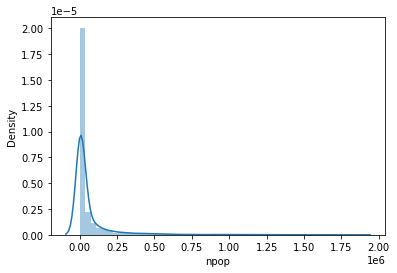

In [183]:
sns.distplot(df[df.npop!='no_data'].npop.astype(int))

## movie yaer

In [270]:
df.year.value_counts()[:10]

no_data    306
2021       212
2020       181
2019       181
2018       175
2022       161
2017       157
2016       146
2011       121
2015       120
Name: year, dtype: int64

<AxesSubplot: xlabel='year', ylabel='Density'>

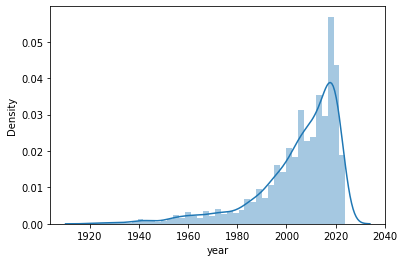

In [185]:
sns.distplot(df[df.year!='no_data'].year)

In [186]:
df[:3]

,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop
0,Moana (2016),모아나,2016,미국,애니메이션/모험/코미디/가족/판타지/뮤지컬,"바다가 선택한 소녀, 모아나. 저주에 걸린 모투누이 섬을 구하기 위해 머나먼 항해를...",3.8,21만,https://an2-img.amz.wtchn.net/image/v2/3eqoRSv...,Moana,"'Animation', 'Adventure', 'Comedy', 'Family', ...","In Ancient Polynesia, when a terrible curse in...","'Ron Clements', 'John Musker', 'Don Hall', 'Ch...","""Auli'i Cravalho"", 'Dwayne Johnson', 'Rachel H...",73141,210000
1,Inside Out (2015),인사이드 아웃,2015,미국,코미디/가족/드라마/판타지/애니메이션/모험,모든 사람의 머릿속에 존재하는 감정 컨트롤 본부. 그곳에서 불철주야 열심히 일하는 ...,4.1,79만,https://an2-img.amz.wtchn.net/image/v2/o-maJ99...,Inside Out,"'Animation', 'Adventure', 'Comedy', 'Drama', '...",After young Riley is uprooted from her Midwest...,"'Pete Docter', 'Ronnie Del Carmen'","'Amy Poehler', 'Phyllis Smith', 'Richard Kind'...",122470,790000
2,Zootopia (2016),주토피아,2016,미국,모험/애니메이션/액션/코미디/가족/키즈,교양 있고 세련된 라이프 스타일을 주도하는 도시 주토피아. 이 곳을 단숨에 혼란에 ...,4.2,92만,no image,Zootopia,"'Animation', 'Adventure', 'Comedy', 'Crime', '...","In a city of anthropomorphic animals, a rookie...","'Byron Howard', 'Rich Moore', 'Jared Bush'","'Ginnifer Goodwin', 'Jason Bateman', 'Idris El...",152081,920000


In [187]:
df['contents_year']=np.nan

In [188]:
cond = df.Contents.str.extract(r'(\(\d+\))')[0].notna()
contents_year = df[cond].Contents.str.extract(r'(\(\d+\))')[0].map(lambda x: x[1:-1])

In [189]:
df.contents_year = df.contents_year.fillna(contents_year)

In [190]:
df.contents_year = df.contents_year.fillna(df.year)

In [191]:
df.contents_year.value_counts()[:15]

2021       222
2019       189
2020       186
2018       183
2022       177
2017       163
2016       151
2015       124
2011       122
2014       120
2009       116
2013       115
no_data    110
2007       102
2012       102
Name: contents_year, dtype: int64

In [192]:
# contents year와 year가 다른애들
df_year_diff = df[df.year != df.contents_year].reset_index(drop=True)
df_year_diff[df_year_diff.year!='no_data'].shape

(49, 17)

In [193]:
df_year = df[df.contents_year!='no_data'].reset_index(drop=True)
df_no_year = df[df.contents_year=='no_data'].reset_index(drop=True)

In [271]:
df_year.shape, df_no_year.shape

((3925, 17), (110, 17))

In [275]:
df_year[df_year.npop!='no_data'].shape, df_year[df_year.npop=='no_data'].shape

((3674, 17), (251, 17))

In [194]:
df_year.contents_year = df_year.contents_year.astype(int)

In [211]:
df_year_bf2000 = df_year[(df_year.contents_year<2000) & (df_year.npop!='no_data')]
df_year_bf2000.shape

(995, 17)

In [281]:
df_year_af2000 = df_year[(df_year.contents_year>=2000) & (df_year.npop!='no_data')]
df_year_af2000.shape

(2679, 17)

In [237]:
df_year_bf2000[df_year_bf2000.npop>=100000].shape

(107, 17)

In [256]:
df_year_bf2000[df_year_bf2000.npop>=100000].sort_values('npop',ascending=False)[:10]

,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop,contents_year
193,Titanic (1997),타이타닉,1997,미국,드라마/로맨스,이 세상 마지막 순간까지 같이하는 사랑,4.3,103만,https://an2-img.amz.wtchn.net/image/v2/wnJxUuy...,Titanic,"'Drama', 'Romance'",A seventeen-year-old aristocrat falls in love ...,'James Cameron',"'Leonardo DiCaprio', 'Kate Winslet', 'Billy Za...",1721,1030000,1997
746,The Truman Show (1998),트루먼 쇼,1998,미국,코미디/드라마,트루먼 버뱅크는 작고 조용한 섬마을에 사는 평범한 세일즈맨이다. 그런 그가 자신의 ...,4.3,88만,https://an2-img.amz.wtchn.net/image/v2/ZbX0eKc...,The Truman Show,"'Comedy', 'Drama'",An insurance salesman discovers his whole life...,'Peter Weir',"'Jim Carrey', 'Laura Linney', 'Noah Emmerich',...",1682,880000,1998
2323,The Shawshank Redemption (1994),쇼생크 탈출,1994,미국,드라마,두려움은 너를 죄수로 가두고,4.4,81만,https://an2-img.amz.wtchn.net/image/v2/32IAJ_E...,The Shawshank Redemption,'Drama',Two imprisoned men bond over a number of years...,'Frank Darabont',"'Tim Robbins', 'Morgan Freeman', 'Bob Gunton',...",318,810000,1994
2574,Léon: The Professional (1994),레옹,1994,"프랑스,미국",액션/범죄/드라마/스릴러,“나도 행복해 지고 싶어.,4.2,72만,https://an2-img.amz.wtchn.net/image/v2/-84JBPw...,Léon: The Professional,"'Action', 'Crime', 'Drama', 'Thriller'",12-year-old Mathilda is reluctantly taken in b...,'Luc Besson',"'Jean Reno', 'Gary Oldman', 'Natalie Portman',...",293,720000,1994
4,Dead Poets Society (1989),죽은 시인의 사회,1989,미국,드라마,"“오 캡틴, 나의 캡틴”",4.2,63만,https://an2-img.amz.wtchn.net/image/v2/Z9BhW72...,Dead Poets Society,"'Comedy', 'Drama'",Maverick teacher John Keating uses poetry to e...,'Peter Weir',"'Robin Williams', 'Robert Sean Leonard', 'Etha...",1246,630000,1989
3832,Society (1989),죽은 시인의 사회,1989,미국,드라마,"“오 캡틴, 나의 캡틴”",4.2,63만,https://an2-img.amz.wtchn.net/image/v2/Z9BhW72...,Society,"'Comedy', 'Horror'",An ordinary teenage boy discovers his family i...,'Brian Yuzna',"'Billy Warlock', ""Concetta D'Agnese"", 'Ben Sla...",5606,630000,1989
775,Notting Hill (1999),노팅 힐,1999,영국,로맨스/로맨틱 코미디,윌리엄 태커(휴 그랜트분)는 웨스트 런던의 ‘노팅 힐’에 사는 소심한 남자. 역시 ...,4.0,57만,https://an2-img.amz.wtchn.net/image/v2/h-rRCA7...,Notting Hill,"'Comedy', 'Drama', 'Romance'",NaN,'Roger Michell',"'Julia Roberts', 'Hugh Grant', 'Richard McCabe...",2671,570000,1999
89,Forrest Gump (1994),포레스트 검프,1994,미국,드라마/로맨스,"""인생은 초콜릿 상자와 같은 거야. 네가 무엇을 고를지 아무도 모른단다…""",4.3,57만,https://an2-img.amz.wtchn.net/image/v2/3CYqWvs...,Forrest Gump,"'Drama', 'Romance'","The presidencies of Kennedy and Johnson, the V...",'Robert Zemeckis',"'Tom Hanks', 'Rebecca Williams', 'Sally Field'...",356,570000,1994
953,The Sixth Sense (1999),식스 센스,1999,미국,드라마/스릴러/공포/미스터리,아동 심리학자 말콤 크로우(Malcolm Crowe: 브루스 윌리스 분)는 자신에게...,4.1,56만,https://an2-img.amz.wtchn.net/image/v2/OwQl5Sl...,The Sixth Sense,"'Drama', 'Mystery', 'Thriller'","A frightened, withdrawn Philadelphia boy who c...",'M. Night Shyamalan',"'Bruce Willis', 'Haley Joel Osment', 'Toni Col...",197499,560000,1999
302,Mulan (1998),뮬란,1998,미국,애니메이션/모험/가족/뮤지컬/전쟁/코미디/키즈,"파씨 가문의 말썽꾸러기 외동딸 뮬란은 선머슴 같은 성격에 강한 자아를 가지고 있어,...",3.9,55만,https://an2-img.amz.wtchn.net/image/v2/3o_2J2g...,Mulan,"'Animation', 'Adventure', 'Comedy', 'Family', ...","To save her father from death in the army, a y...","'Tony Bancroft', 'Barry Cook'","'Miguel Ferrer', 'Harvey Fierstein', 'Freda Fo...",300075,550000,1998


In [261]:
df_year_bf2000_select = df_year_bf2000[df_year_bf2000.npop>=100000].reset_index(drop=True)
df_year_bf2000_select.shape

(107, 17)

In [277]:
df_year_af2000 = df_year[(df_year.contents_year>=2000) & (df_year.npop!='no_data')]
df_year_af2000.shape

(2679, 17)

In [279]:
df_year_af2000_select = df_year_af2000[df_year_af2000.npop>=10000].reset_index(drop=True)

In [280]:
print(df_year_af2000_select.shape)
df_year_af2000_select[:5]

(1259, 17)


,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop,contents_year
0,Moana (2016),모아나,2016,미국,애니메이션/모험/코미디/가족/판타지/뮤지컬,"바다가 선택한 소녀, 모아나. 저주에 걸린 모투누이 섬을 구하기 위해 머나먼 항해를...",3.8,21만,https://an2-img.amz.wtchn.net/image/v2/3eqoRSv...,Moana,"'Animation', 'Adventure', 'Comedy', 'Family', ...","In Ancient Polynesia, when a terrible curse in...","'Ron Clements', 'John Musker', 'Don Hall', 'Ch...","""Auli'i Cravalho"", 'Dwayne Johnson', 'Rachel H...",73141,210000,2016
1,Inside Out (2015),인사이드 아웃,2015,미국,코미디/가족/드라마/판타지/애니메이션/모험,모든 사람의 머릿속에 존재하는 감정 컨트롤 본부. 그곳에서 불철주야 열심히 일하는 ...,4.1,79만,https://an2-img.amz.wtchn.net/image/v2/o-maJ99...,Inside Out,"'Animation', 'Adventure', 'Comedy', 'Drama', '...",After young Riley is uprooted from her Midwest...,"'Pete Docter', 'Ronnie Del Carmen'","'Amy Poehler', 'Phyllis Smith', 'Richard Kind'...",122470,790000,2015
2,Zootopia (2016),주토피아,2016,미국,모험/애니메이션/액션/코미디/가족/키즈,교양 있고 세련된 라이프 스타일을 주도하는 도시 주토피아. 이 곳을 단숨에 혼란에 ...,4.2,92만,no image,Zootopia,"'Animation', 'Adventure', 'Comedy', 'Crime', '...","In a city of anthropomorphic animals, a rookie...","'Byron Howard', 'Rich Moore', 'Jared Bush'","'Ginnifer Goodwin', 'Jason Bateman', 'Idris El...",152081,920000,2016
3,Legally Blonde (2001),금발이 너무해,2001,미국,로맨스/코미디/로맨틱 코미디/드라마,부유한 집안 출신에 금발과 제법 큰 가슴을 지닌 여학생 클럽 회장 엘 우즈. 세상 ...,3.6,30만,https://an2-img.amz.wtchn.net/image/v2/xSEXNF5...,Legally Blonde,"'Comedy', 'Romance'",NaN,'Robert Luketic',"'Reese Witherspoon', 'Luke Wilson', 'Selma Bla...",4447,300000,2001
4,Coraline (2009),코렐라인: 비밀의 문,2009,미국,애니메이션/드라마/가족/판타지/스릴러/액션/공포/미스터리/모험,"새로운 집으로 이사해 모든 것이 낯선 코렐라인은 부모님도 일 때문에 바쁘자, 혼자 ...",3.8,16만,https://an2-img.amz.wtchn.net/image/v2/GTwZ3A6...,Coraline,"'Animation', 'Drama', 'Family', 'Fantasy', 'Th...",NaN,'Henry Selick',"'Dakota Fanning', 'Teri Hatcher', 'Jennifer Sa...",66097,160000,2009


In [254]:
df_year_af2000[df_year_af2000.npop>=10000].contents_year.value_counts()

2016    81
2011    74
2017    73
2018    67
2009    65
2007    65
2013    64
2015    64
2012    61
2014    61
2004    60
2008    58
2010    56
2019    56
2005    51
2006    48
2003    43
2021    42
2002    41
2001    33
2020    31
2022    26
Name: contents_year, dtype: int64

In [269]:
df_no_year.shape

(110, 17)

In [283]:
df_no_year_select = df_no_year[df_no_year.npop!='no_data'].reset_index(drop=True)
df_no_year_select

,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop,contents_year
0,Now You See Me (Franchise),나우 유 씨 미 3,no_data,미국,범죄/스릴러,<나우 유 씨 미>의 세 번째 시리즈.,4.0,30,no image,Now You See Me,"'Crime', 'Mystery', 'Thriller'",An F.B.I. Agent and an Interpol Detective trac...,'Louis Leterrier',"'Jesse Eisenberg', 'Mark Ruffalo', 'Woody Harr...",102903,30,no_data
1,Bill & Ted (Franchise),킬빌 3,no_data,no_data,no_data,-,3.7,42,no image,Bill & Ted Face the Music,"'Adventure', 'Comedy', 'Music', 'Sci-Fi'",Once told they'd save the universe during a ti...,'Dean Parisot',"'Keanu Reeves', 'Alex Winter', 'Kristen Schaal...",4571,42,no_data
2,Sherlock Holmes,셜록홈즈 3,no_data,no_data,미스터리/범죄/액션,-,3.6,7,no image,Sherlock Holmes,"'Action', 'Adventure', 'Mystery'",NaN,'Guy Ritchie',"'Robert Downey Jr.', 'Jude Law', 'Rachel McAda...",73017,7,no_data


In [291]:
df_select = pd.concat([df_year_af2000_select,df_year_bf2000_select,df_no_year_select]).reset_index(drop=True)
df_select.shape

(1369, 17)

## Character df 전처리

In [37]:
cdf.MBTI.value_counts()

ESTP    1808
ISFP    1757
ESTJ    1706
ISTP    1617
ISTJ    1592
INFP    1559
ISFJ    1541
ESFP    1533
ENTJ    1521
ENTP    1393
ESFJ    1378
INFJ    1328
INTJ    1291
ENFP    1280
ENFJ    1235
INTP    1234
XXXX     540
Name: MBTI, dtype: int64

In [393]:
cdf2 = cdf.copy()
cdf.shape

(24313, 8)

In [394]:
cdf2 = cdf2[cdf2.MBTI!='XXXX'].reset_index(drop=True)
cdf2.shape

(23773, 8)

In [395]:
cdf2 = cdf2[cdf2.Enneagram!='XwX'].reset_index(drop=True)
cdf2.shape

(22053, 8)

In [396]:
## Empty 이미지 제거
empty_img_src = 'https://pdb-web-static.s3.us-east-2.amazonaws.com/avatars/profile_avatar.png'

In [397]:
cdf2 = cdf2[cdf2.img_src!=empty_img_src]
cdf2.shape

(20771, 8)

In [398]:
cdf2[cdf2.duplicated(subset=['Character','Contents','MBTI','Enneagram'],keep=False)].sort_values('Character')

,Character,Contents,Votes,MBTI,Enneagram,img_src,CharacterId,movieId
7095,"""Arthur Slugworth""",Willy Wonka and the Chocolate Factory (1971),12/3,INTJ,4w5,https://static1.personality-database.com/profi...,7731,176299.0
7075,"""Arthur Slugworth""",Willy Wonka and the Chocolate Factory (1971),12/3,INTJ,4w5,https://static1.personality-database.com/profi...,7709,176299.0
2206,"""Iris""",The Midnight Sky (2020),15/1,INFP,4w5,https://static1.personality-database.com/profi...,2399,300268.0
2181,"""Iris""",The Midnight Sky (2020),15/1,INFP,4w5,https://static1.personality-database.com/profi...,2374,300268.0
18320,"""Joliet"" Jake Blues",The Blues Brothers (1980),33/0,ESTP,8w7,https://static1.personality-database.com/profi...,20191,1220.0
...,...,...,...,...,...,...,...,...
12356,Яна Семакина,Univer. New Dorm,31/0,ISFJ,1w2,https://static1.personality-database.com/profi...,13568,300041.0
14704,भालू (Baloo),The Jungle Book (1967),162/6,ESFP,9w8,https://static1.personality-database.com/profi...,16227,137857.0
14703,भालू (Baloo),The Jungle Book (1967),162/6,ESFP,9w8,https://static1.personality-database.com/profi...,16226,137857.0
17487,“Herm” Stockburn,The Ridiculous 6,8/0,ISFP,9w8,https://static1.personality-database.com/profi...,19304,148652.0


In [399]:
cdf2 = cdf2.drop_duplicates(subset=['Character','Contents','MBTI','Enneagram']).reset_index(drop=True)
cdf2.shape

(18044, 8)

## Votes

In [32]:
# Votes에 모두 '/' 가 포함됨을 확인
cdf[cdf.Votes.str.contains('/')].shape

(24313, 9)

In [400]:
def convert_str2num(num_str):
    num_str = num_str.split('/')[0]
    if num_str.endswith('k'):
        return int(float(num_str[:-1])*1000)
    else:
        return int(num_str)

In [401]:
cdf2['vote'] = cdf2.Votes.map(convert_str2num)

In [402]:
cdf2.vote.describe()

count    18044.000000
mean        99.391487
std        302.983949
min          5.000000
25%         14.000000
50%         27.000000
75%         68.000000
max       7300.000000
Name: vote, dtype: float64

<AxesSubplot: ylabel='Frequency'>

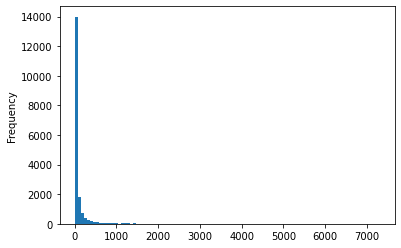

In [403]:
cdf2.vote.plot(kind='hist',bins=100)

In [404]:
cdf_top = cdf2.sort_values('vote',ascending=False).groupby('movieId').head(3).reset_index(drop=True)
cdf_top

,Character,Contents,Votes,MBTI,Enneagram,img_src,CharacterId,movieId,vote
0,Bruno Madrigal,Encanto (2021),7.3k/1.5k,ISFJ,6w5,https://static1.personality-database.com/profi...,13078,300005.0,7300
1,Tyler Durden,Fight Club (1999),6.9k/2.9k,ESTP,8w7,https://static1.personality-database.com/profi...,19465,2959.0,6900
2,Elsa,Frozen (Franchise),6.2k/2.9k,INFJ,1w9,https://static1.personality-database.com/profi...,22947,75395.0,6200
3,Hermione Granger,Harry Potter / Wizarding World Films,6.2k/830,ESTJ,1w2,https://static1.personality-database.com/profi...,11322,69844.0,6200
4,Loki Laufeyson,Avengers,6k/1.3k,INFJ,4w3,https://static1.personality-database.com/profi...,22948,300932.0,6000
...,...,...,...,...,...,...,...,...,...
7969,Rovach Alimov,6 Underground (2019),5/0,ESTJ,3w4,https://static1.personality-database.com/profi...,13029,300771.0,5
7970,Joan Carlyle,Ice Princess (2005),5/0,ESTJ,3w4,https://static1.personality-database.com/profi...,13051,32289.0,5
7971,"Lornette ""Mace"" Mason",Strange Days (1995),5/0,ESTJ,8w9,https://static1.personality-database.com/profi...,13058,198.0,5
7972,Patches O'Houlihan,Dodgeball (2004),5/0,ESTJ,3w4,https://static1.personality-database.com/profi...,13059,8528.0,5


<AxesSubplot: xlabel='vote', ylabel='Density'>

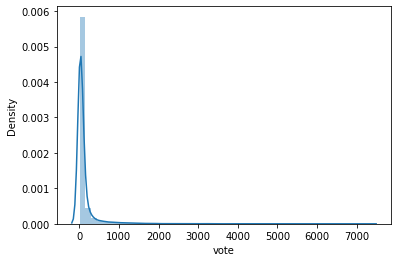

In [405]:
sns.distplot(cdf_top.vote)

In [406]:
cdf_top.movieId.nunique()

3558

In [407]:
character_movieIds = sorted(set(cdf_top.movieId))
len(character_movieIds)

3558

In [408]:
df_select.shape

(1369, 17)

In [409]:
df_select_common = df_select[df_select.movieId.isin(character_movieIds)].reset_index(drop=True)
df_select_common.shape

(1282, 17)

In [410]:
cdf_top_common = cdf_top[cdf_top.movieId.isin(df_select_common.movieId)].reset_index(drop=True)
cdf_top_common.shape

(3144, 9)

In [321]:
cdf_top_common.movieId = cdf_top_common.movieId.astype(int)

In [411]:
cdf_top_common[:3]

,Character,Contents,Votes,MBTI,Enneagram,img_src,CharacterId,movieId,vote
0,Bruno Madrigal,Encanto (2021),7.3k/1.5k,ISFJ,6w5,https://static1.personality-database.com/profi...,13078,300005.0,7300
1,Tyler Durden,Fight Club (1999),6.9k/2.9k,ESTP,8w7,https://static1.personality-database.com/profi...,19465,2959.0,6900
2,Elsa,Frozen (Franchise),6.2k/2.9k,INFJ,1w9,https://static1.personality-database.com/profi...,22947,75395.0,6200


In [412]:
df_mid_cid = cdf_top_common.groupby('movieId').Character.count().reset_index()
df_mid_cid[:3]

,movieId,Character
0,1.0,3
1,2.0,3
2,48.0,3


In [413]:
df_select_duple = df_select_common[df_select_common.duplicated(subset=['ko_title','contents_year'],keep=False)].sort_values('ko_title')
print(df_select_duple.shape)
df_select_duple[:3]

(64, 17)


,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop,contents_year
110,8 Mile (2002),8 마일,2002,"미국,독일",드라마/음악,"디트로이트의 소외받은 계층은 생존 그 자체가 삶의 목적이다. 이러한 계층, 특히 빈...",3.8,35만,https://an2-img.amz.wtchn.net/image/v2/79PzPCO...,8 Mile,"'Drama', 'Music'","Follows a young rapper in the Detroit area, st...",'Curtis Hanson',"'Eminem', 'Kim Basinger', 'Mekhi Phifer', 'Bri...",5810,350000,2002
608,8 1/2,8 마일,2002,"미국,독일",드라마/음악,"디트로이트의 소외받은 계층은 생존 그 자체가 삶의 목적이다. 이러한 계층, 특히 빈...",3.8,35만,https://an2-img.amz.wtchn.net/image/v2/79PzPCO...,8 1/2,"'Short', 'Comedy', 'Drama'","Life is hard for an 8½-year-old director.', ""I...",'Bryce Edmonds',"'Lev Cameron', 'Gracie Miller', 'Shae Smolik',...",1251,350000,2002
1055,Nobody (2021),노바디,2021,미국,액션/코미디,정말이지 착하게 살고 싶었다. 참으려고 했다.,3.3,2만,https://an2-img.amz.wtchn.net/image/v2/r_odx7J...,Nobody,"'Action', 'Crime', 'Drama', 'Thriller'",NaN,'Ilya Naishuller',"'Bob Odenkirk', 'Aleksey Serebryakov', 'Connie...",300827,20000,2021


In [414]:
df_select_noduple = df_select_common.drop_duplicates(subset=['ko_title','contents_year'],keep=False)
df_select_noduple.shape

(1218, 17)

In [415]:
cols=['movieId','Contents', 'ko_title', 'Character', 'year', 'rating', 'popular', 'npop', 'contents_year']

df_select_duple2 = df_select_duple.merge(df_mid_cid, how='left', on='movieId')[cols]
select_index=[0, 2, 5, 7, 8, 11, 13, 14, 17, 18, 20, 23, 24, 26, 29, 31, 32, 37,
             38, 40, 43, 45, 46, 48, 51, 52, 54, 59, 60, 63]

In [416]:
df_select_duple3 = df_select_duple2.loc[select_index,:]
df_select_duple3

,movieId,Contents,ko_title,Character,year,rating,popular,npop,contents_year
0,5810,8 Mile (2002),8 마일,3,2002,3.8,35만,350000,2002
2,300827,Nobody (2021),노바디,1,2021,3.3,2만,20000,2021
5,300940,The Batman (2022),더 배트맨,3,2022,3.5,4만,40000,2022
7,185233,The Fall (2006),더 폴: 오디어스와 환상의 문,1,2006,4.0,7만,70000,2006
8,56782,There Will Be Blood (2007),데어 윌 비 블러드,3,2007,4.1,5만,50000,2007
11,300116,Drive My Car,드라이브 마이 카,3,2021,4.0,4만,40000,2021
13,68952,Drag Me To Hell (2009),드래그 미 투 헬,3,2009,2.8,10만,100000,2009
14,140160,Descendants (Franchise),디센던트,3,2011,3.6,2만,20000,2011
17,70286,District 9 (2009),디스트릭트 9,3,2009,3.8,41만,410000,2009
18,95873,Ruby Sparks,루비 스팍스,3,2012,3.6,7만,70000,2012


In [417]:
df_select_duple_last = df_select_duple[df_select_duple.movieId.isin(df_select_duple3.movieId)]
df_select_duple_last.shape

(30, 17)

In [418]:
movie_processed = pd.concat([df_select_noduple,df_select_duple_last])
movie_processed.shape

(1248, 17)

In [419]:
cdf_top_common.shape

(3144, 9)

In [420]:
cdf_processed = cdf_top_common[cdf_top_common.movieId.isin(movie_processed.movieId)]
cdf_processed.shape

(3072, 9)

In [421]:
cols=['movieId','Contents', 'contents_year', 'ko_title', 'year', 'rating', 'popular', 'npop']
movie_processed[cols]

,movieId,Contents,contents_year,ko_title,year,rating,popular,npop
0,73141,Moana (2016),2016,모아나,2016,3.8,21만,210000
1,122470,Inside Out (2015),2015,인사이드 아웃,2015,4.1,79만,790000
2,152081,Zootopia (2016),2016,주토피아,2016,4.2,92만,920000
3,4447,Legally Blonde (2001),2001,금발이 너무해,2001,3.6,30만,300000
4,66097,Coraline (2009),2009,코렐라인: 비밀의 문,2009,3.8,16만,160000
...,...,...,...,...,...,...,...,...
1077,300855,The Chorus (2004),2004,코러스,2004,3.9,13만,130000
93,70008,Kill Your Darlings (2013),2013,킬 유어 달링,2013,3.5,12만,120000
577,8529,The terminal (2004),2004,터미널,2004,4.0,33만,330000
866,300617,Family Man (2000),2000,패밀리 맨,2000,3.8,6만,60000


In [422]:
cdf_processed.columns

Index(['Character', 'Contents', 'Votes', 'MBTI', 'Enneagram', 'img_src',
       'CharacterId', 'movieId', 'vote'],
      dtype='object')

In [432]:
ch_cols = ['Character', 'vote', 'MBTI', 'Enneagram', 'CharacterId', 'movieId']

In [433]:
cdf_movie_merge = cdf_processed[ch_cols].merge(movie_processed[cols], on='movieId', how='left')
cdf_movie_merge

,Character,vote,MBTI,Enneagram,CharacterId,movieId,Contents,contents_year,ko_title,year,rating,popular,npop
0,Bruno Madrigal,7300,ISFJ,6w5,13078,300005.0,Encanto (2021),2021,엔칸토: 마법의 세계,2021,3.5,3만,30000
1,Tyler Durden,6900,ESTP,8w7,19465,2959.0,Fight Club (1999),1999,파이트 클럽,1999,4.1,34만,340000
2,Elsa,6200,INFJ,1w9,22947,75395.0,Frozen (Franchise),2019,겨울왕국 2,2019,3.6,17만,170000
3,Loki Laufeyson,6000,INFJ,4w3,22948,300932.0,Avengers,2012,어벤져스,2012,4.2,185만,1850000
4,Patrick Bateman,6000,ENTJ,3w4,8133,3535.0,American Psycho (2000),2000,아메리칸 사이코,2000,3.7,14만,140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,Tony Block,5,INTP,5w6,5392,54995.0,Planet Terror (2007),2007,플래닛 테러,2007,3.4,2만,20000
3068,Horvath,5,ENTJ,3w4,9674,38886.0,The Sorcerer’s Apprentice (2010),2010,마법사의 제자,2010,2.8,10만,100000
3069,Mrs Kehoe,5,ESTJ,3w2,13067,127108.0,Brooklyn (2015),2015,브루클린 나인-나인 시즌 3,2015,4.2,1만,10000
3070,Rovach Alimov,5,ESTJ,3w4,13029,300771.0,6 Underground (2019),2019,6 언더그라운드,2019,2.9,2만,20000


In [434]:
cdf_movie_merge[cdf_movie_merge.Contents.str.contains('The Day After Tomorrow')]

,Character,vote,MBTI,Enneagram,CharacterId,movieId,Contents,contents_year,ko_title,year,rating,popular,npop
1924,"Samuel ""Sam"" Hall",31,INFJ,6w5,23493,191723.0,The Day After Tomorrow (2004),2004,투모로우,2004,3.6,62만,620000
2151,Laura Chapman,24,ENFJ,2w3,471,191723.0,The Day After Tomorrow (2004),2004,투모로우,2004,3.6,62만,620000
3051,Brian Parks,6,INTP,5w6,5302,191723.0,The Day After Tomorrow (2004),2004,투모로우,2004,3.6,62만,620000


In [441]:
cdf_movie_merge_last = cdf_movie_merge[cdf_movie_merge.vote>=10]

In [447]:
cdf_movie_merge_last.shape, cdf_movie_merge_last.movieId.nunique()

((2869, 13), 1193)

In [442]:
cdf_movie_merge_last.MBTI.value_counts()

ESTP    259
INFP    256
ISFP    222
ENFP    210
ISTP    207
ENTP    206
INFJ    194
ESFP    177
ISTJ    174
ENTJ    166
INTJ    166
ISFJ    149
INTP    142
ESTJ    124
ENFJ    116
ESFJ    101
Name: MBTI, dtype: int64

In [445]:
cdf_movie_merge_last.groupby("MBTI").Enneagram.nunique()

MBTI
ENFJ    15
ENFP    16
ENTJ    13
ENTP    15
ESFJ    11
ESFP    13
ESTJ     9
ESTP    14
INFJ    16
INFP    15
INTJ    13
INTP    13
ISFJ    12
ISFP    17
ISTJ    14
ISTP    13
Name: Enneagram, dtype: int64

In [443]:
cdf_movie_merge_last.groupby(["MBTI","Enneagram"]).Character.count().reset_index()

,MBTI,Enneagram,Character
0,ENFJ,1w2,15
1,ENFJ,1w9,5
2,ENFJ,2w1,8
3,ENFJ,2w3,35
4,ENFJ,3w2,9
5,ENFJ,3w4,6
6,ENFJ,4w3,4
7,ENFJ,6w5,3
8,ENFJ,6w7,7
9,ENFJ,7w6,4
